# Figure 1: Iso-curve panels

This notebook generates all iso-curve figures (all metrics).


In [1]:
import sys
from pathlib import Path

sys.path.append(str(Path("..") / "src"))


## Parameters
Parameters match the paper; change only if exploring variants.


In [2]:
from pathlib import Path
from metric_paper.metrics import ReferencePoint, metric_matrices, reference_metrics
from metric_paper.plotting import IsoCurvePlotter, build_curve_grid, set_plot_style

positives = 500
negatives = 500
reference = ReferencePoint(tp=450, fp=90)
title = r"$\eta$ or $\mathrm{ipv}_{\mathrm{ref}}$"

out_dir = Path("..") / "figures"
out_dir.mkdir(exist_ok=True)

set_plot_style()


Plotting Accuracy curve.


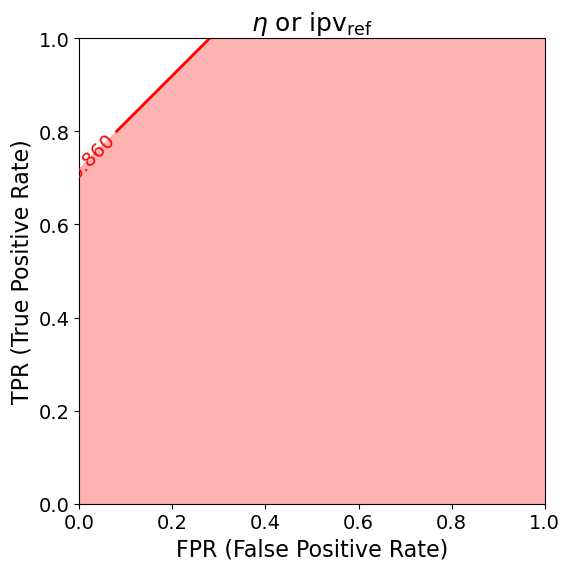

Plotting Precision curve.


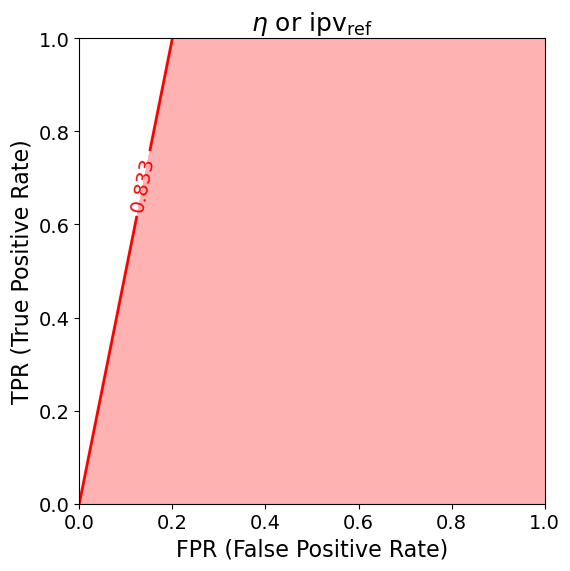

Plotting TPR (Recall) curve.


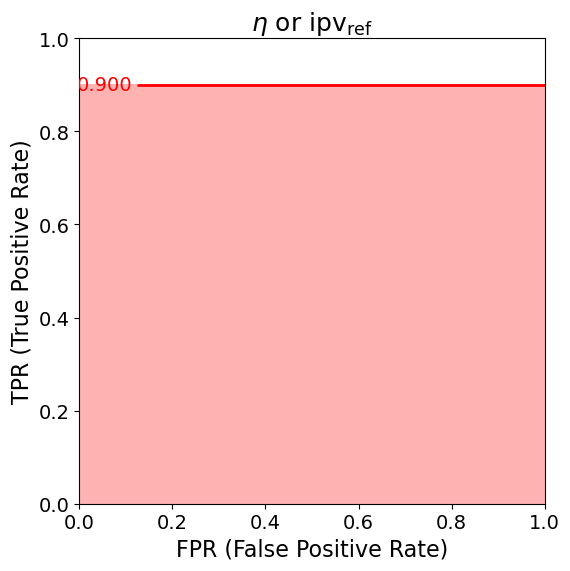

Plotting F1-Score curve.


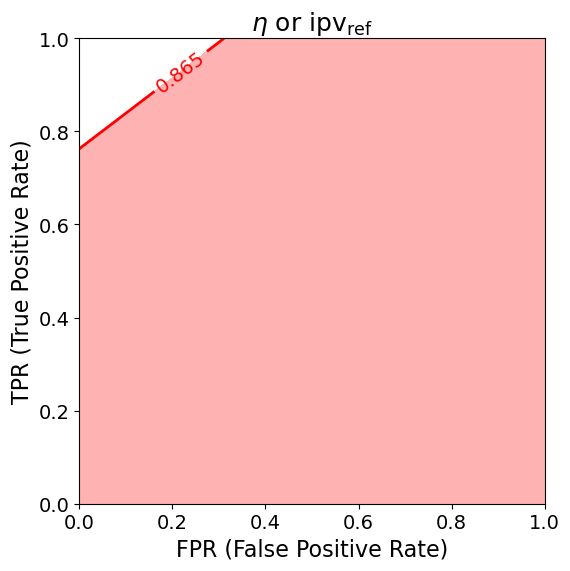

Plotting Cohen's Kappa curve.


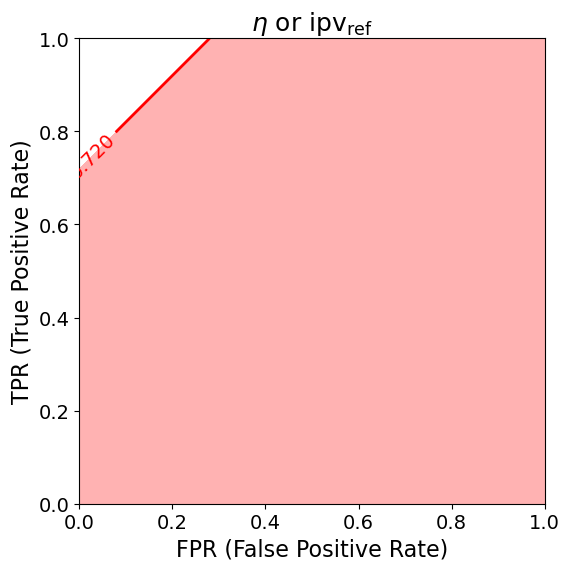

Plotting MCC curve.


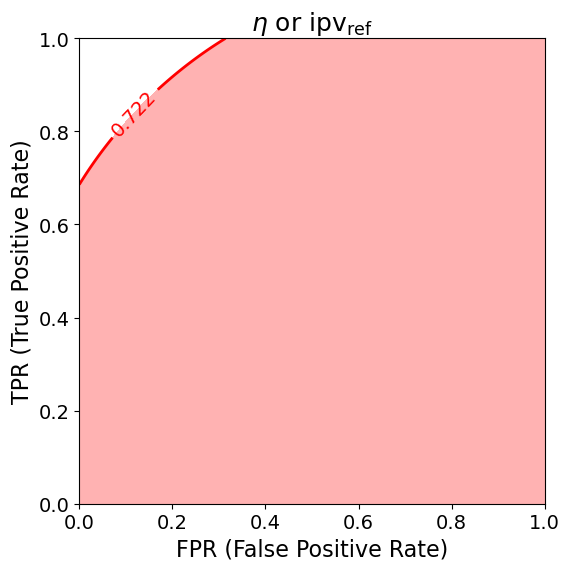

In [3]:
def slugify(name):
    return name.replace(' ', '_').replace('(', '').replace(')', '').replace("'", '').lower()

matrices = metric_matrices(positives, negatives)
ref_values = reference_metrics(positives, negatives, reference)

grid = build_curve_grid(positives, negatives)
curves = IsoCurvePlotter(grid=grid, title=title)

metric_keys = [
    "Accuracy",
    "Precision",
    "TPR (Recall)",
    "F1-Score",
    "Cohen's Kappa",
    "MCC",
]

for key in metric_keys:
    path = out_dir / f"fig1_isocurve_{slugify(key)}.svg"
    print(f"Plotting {key} curve.")
    curves.plot_one(matrices[key], ref_values[key], path)
